In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df= pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
#df[['Embarked']].isna().sum()

<AxesSubplot:>

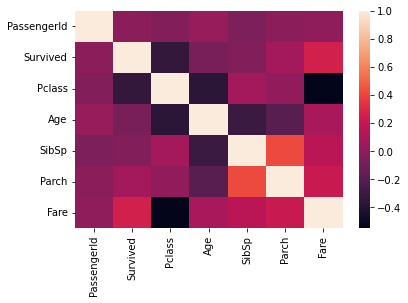

In [30]:
import seaborn as sns
sns.heatmap(df.corr())

<AxesSubplot:>

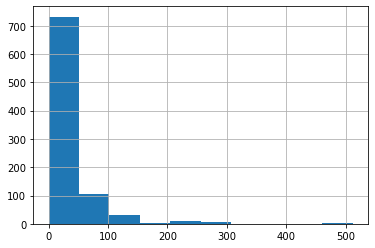

In [31]:
df['Fare'].hist()

In [119]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression

In [33]:
import sklearn

from sklearn.model_selection import train_test_split


In [34]:
X= df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]#features

y=df['Survived']

In [120]:
num_features = ["Age",'Parch']
numeric_bin= ['fare']
categorical_features = ["Embarked", "Sex", "Pclass"]
all_transformer =Pipeline([('imput',SimpleImputer(strategy="mean")),('scale', StandardScaler())])
numeric_biner= KBinsDiscretizer(n_bins= 5,strategy='uniform',encode='onehot')

fare_transformer =Pipeline([('fare',SimpleImputer(strategy="mean")),('bin',KBinsDiscretizer(n_bins= 5,strategy='uniform',encode='onehot'))])
#(caterogic_coder=OneHotEncoder(sparse=False, handle_unknown='ignore'))

cat_transformer=Pipeline([('mostfreq',SimpleImputer(strategy="most_frequent")),('onecod',OneHotEncoder(sparse=False, handle_unknown='ignore'))])

In [121]:
trans = ColumnTransformer([("num", all_transformer, num_features),
('fare',fare_transformer,['Fare']),
('ctcod',cat_transformer,categorical_features)])


In [83]:
c

['Age', 'Parch', 'Embarked', 'Sex', 'Pclass']

In [84]:
categorical_features

['Embarked', 'Sex', 'Pclass']

In [122]:
pipeline = make_pipeline(trans, LogisticRegression(max_iter=300))

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5000,S
733,2,male,23.0,0,0,13.0000,S
382,3,male,32.0,0,0,7.9250,S
704,3,male,26.0,1,0,7.8542,S
813,3,female,6.0,4,2,31.2750,S


In [69]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    object 
 2   Age       572 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  710 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 44.5+ KB


In [111]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imput',
                                                                   SimpleImputer())]),
                                                  ['Age', 'Parch']),
                                                 ('fare',
                                                  Pipeline(steps=[('fare',
                                                                   SimpleImputer()),
                                                                  ('bin',
                                                                   KBinsDiscretizer(strategy='uniform'))]),
                                                  ['Fare']),
                                                 ('ctcod',
                                                  Pipeline(steps=[('mostfreq',
                                                                   SimpleI

In [81]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5000,S
733,2,male,23.0,0,0,13.0000,S
382,3,male,32.0,0,0,7.9250,S
704,3,male,26.0,1,0,7.8542,S
813,3,female,6.0,4,2,31.2750,S
...,...,...,...,...,...,...,...
106,3,female,21.0,0,0,7.6500,S
270,1,male,NaN,0,0,31.0000,S
860,3,male,41.0,2,0,14.1083,S
435,1,female,14.0,1,2,120.0000,S


In [124]:
trans.fit_transform(X_train)

array([[ 1.2322632 , -0.47934164,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.50048197, -0.47934164,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.1926161 , -0.47934164,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.88571416, -0.47934164,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [-1.19358003,  2.04874166,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.65450376,  0.78470001,  1.        , ...,  1.        ,
         0.        ,  0.        ]])

In [112]:
print( "model score: %.3f" %pipeline.score(X_test, y_test))

model score: 0.799


In [ ]:
print(pipeline.predict(X_test))

[0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1]


In [ ]:
print(pipeline.predict_proba(X_test)[:, 1])

[0.12772741 0.24042948 0.10089413 0.8761412  0.75722899 0.9209121
 0.66490301 0.11559748 0.70629407 0.86620069 0.36258968 0.05933858
 0.54854141 0.13240632 0.22158177 0.90411018 0.33462448 0.66500182
 0.26110913 0.30776466 0.09248965 0.34508332 0.60986482 0.1015564
 0.09564073 0.09144874 0.44357886 0.24299526 0.10415389 0.53951662
 0.10307979 0.59244298 0.54350761 0.58051698 0.10540404 0.14588076
 0.39020923 0.66490301 0.93354363 0.09248965 0.36417996 0.08252587
 0.09256215 0.12728067 0.54492768 0.06695509 0.10321576 0.09516534
 0.09209289 0.2478419  0.76282942 0.84312204 0.02994982 0.37875671
 0.05164156 0.89940513 0.23606865 0.86340337 0.80577596 0.69127554
 0.09866045 0.84717179 0.83465628 0.4003679  0.12728067 0.69748748
 0.36417996 0.08287811 0.14210809 0.91517121 0.80792909 0.92168832
 0.53059116 0.9232822  0.09450643 0.07384347 0.62925757 0.92254086
 0.78682802 0.38377032 0.10491198 0.81879015 0.90738346 0.12727289
 0.35561349 0.29952299 0.93149919 0.94200387 0.2920383  0.092186

In [ ]:
pipeline.coef_

AttributeError: 'Pipeline' object has no attribute 'coef_'

In [125]:
Xtrain_fe = trans.fit_transform(X_train)
Xtrain_fe
dummy=pd.DataFrame(Xtrain_fe,)
dummy

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.232263e+00,-0.479342,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,-5.004820e-01,-0.479342,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.926161e-01,-0.479342,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,-2.694493e-01,-0.479342,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,-1.809667e+00,2.048742,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,-6.545038e-01,-0.479342,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
708,2.735977e-16,-0.479342,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
709,8.857142e-01,-0.479342,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
710,-1.193580e+00,2.048742,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [126]:
Xtest_fe = trans.transform(X_test)
Xtest_fe


array([[ 2.73597664e-16,  7.84700011e-01,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.15605203e-01, -4.79341636e-01,  1.00000000e+00, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-7.31514655e-01, -4.79341636e-01,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       ...,
       [ 6.54681476e-01,  5.84086660e+00,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-9.62547343e-01, -4.79341636e-01,  1.00000000e+00, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-1.96368899e+00,  7.84700011e-01,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [127]:
m=LogisticRegression()
m.fit(Xtrain_fe, y_train)

LogisticRegression()

In [128]:
m.score(Xtrain_fe,y_train)

0.7991573033707865

In [129]:
m.predict(Xtest_fe)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [130]:
m.score(Xtest_fe,y_test)

0.7988826815642458